# Flight Dalay & Cancellation Prediction

## import libraries

In [1]:
#pip install fastparquet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## load data

In [3]:
# The list of files' name, helping consturct pandas dataframe for used.
parquet_files = glob.glob('./archive/Combined_Flights_*.parquet')

In [4]:
parquet_files

['./archive\\Combined_Flights_2018.parquet',
 './archive\\Combined_Flights_2019.parquet',
 './archive\\Combined_Flights_2020.parquet',
 './archive\\Combined_Flights_2021.parquet',
 './archive\\Combined_Flights_2022.parquet']

## change data form into dataframe

In [5]:
column_subset = [
    "FlightDate",
    "Airline",
    "Tail_Number",
    "Flight_Number_Marketing_Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
]

In [6]:
dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))

In [7]:
df = pd.concat(dfs).reset_index(drop=True)

In [8]:
cat_col = ['Airline','Origin','Dest','OriginStateName','DestStateName']
for c in cat_col:
    df[c] = df[c].astype("category") 

## plot the data

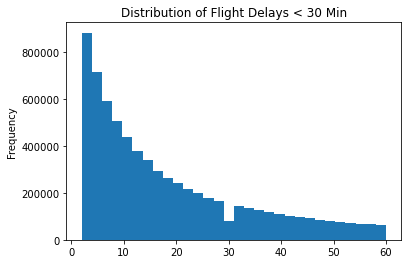

In [9]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()